In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df.shape

(7043, 21)

In [30]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [31]:
duplicate_customers = df["customerID"].duplicated().sum()
print("Duplicate customer IDs:", duplicate_customers)


Duplicate customer IDs: 0


In [32]:
sns.set_theme(style="whitegrid")

C:\Users\HP\AppData\Local\Temp\ipykernel_7024\4238537528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="coolwarm")


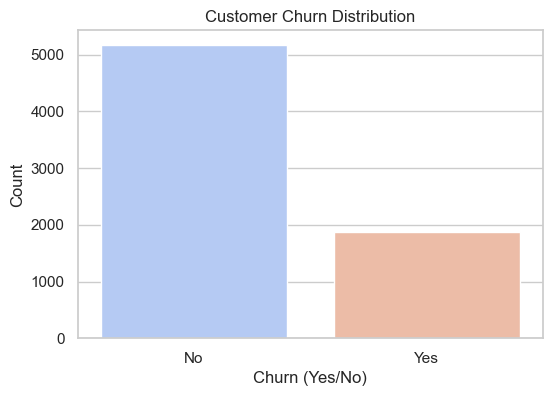

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (Yes/No)")
plt.ylabel("Count")
plt.show()

In [36]:
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print("Churn Rate:\n", churn_rate)

Churn Rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


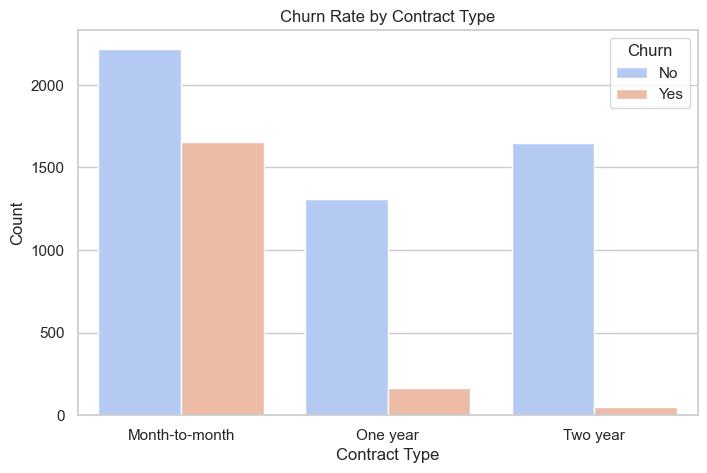

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

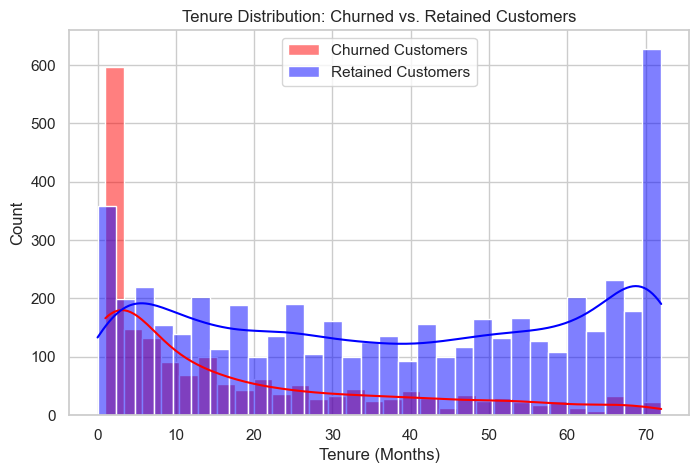

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Churn"] == "Yes"]["tenure"], bins=30, kde=True, color="red", label="Churned Customers")
sns.histplot(df[df["Churn"] == "No"]["tenure"], bins=30, kde=True, color="blue", label="Retained Customers")
plt.title("Tenure Distribution: Churned vs. Retained Customers")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7024\3392672824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


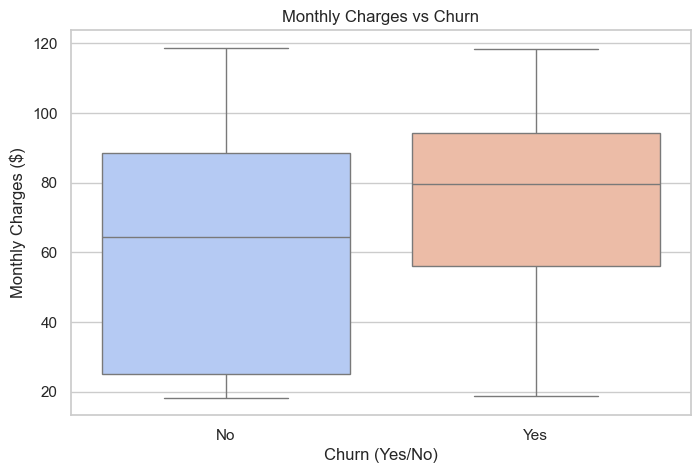

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn (Yes/No)")
plt.ylabel("Monthly Charges ($)")
plt.show()

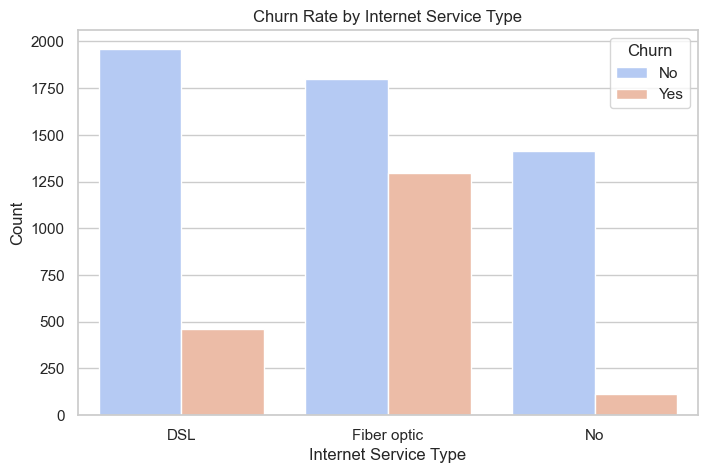

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x="InternetService", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()